## Using Bron-Kerbosch

In [22]:
from term_grouping import *
import matplotlib.pyplot as plt
from collections import Counter
import time
import numpy as np

plt.rcParams["font.size"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["font.family"] = 'sans-serif'

In [23]:
hfile = 'hamiltonians/sampleH2.txt'
H = parseHamiltonian(hfile)

ops = [term[1] for term in H]
Nq = max([len(op) for op in ops])
print('{} qubits'.format(Nq))

for commutativity_type in [QWCCommutativity, FullCommutativity]:
    cliques = genMeasureCircuit(H, Nq, commutativity_type)
    for cliq in cliques:
        print(cliq)
    print()

8 qubits
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.12s
{'Z**Z****', '**Z*****', '**Z***Z*', '**ZZ****', '***Z****', '*Z****Z*', '***ZZ***', '****Z**Z', '*Z**Z***', 'Z*****Z*', 'Z******Z', '*ZZ*****', '***Z*Z**', '**Z****Z', 'Z*Z*****', '*****ZZ*', '*Z***Z**', '****ZZ**', 'ZZ******', '***Z**Z*', '*Z*Z****', '***Z***Z', '******ZZ', '****Z***', '*****Z**', '******Z*', '*Z*****Z', '****Z*Z*', '*Z******', '**Z**Z**', '**Z*Z***', '*******Z', '*****Z*Z', 'Z****Z**', 'Z*******', 'Z***Z***'}
{'*XYYX***', 'XX****YY', '***YXXY*', '**YYXX**', 'XXYY****', '****XXYY'}
{'***XYYX*', '**XXYY**', 'YY****XX', '*YXXY***', '****YYXX', 'YYXX****'}
{'*YYXX***', '**YXXY**', '****XYYX', 'XY****YX', 'XYYX****', '***XXYY*'}
{'****YXXY', '**XYYX**', 'YX****XY', '*XXYY***', 'YXXY****', '***YYXX*'}
{'XZZZX*Z*', 'XZ*ZX***', 'XZZZX***', 'XZZZXZ**', 'X*ZZX***', 'XZZZX**Z', 'XZZ*X***'}
{'YZZZY**Z', 'YZZZY*Z*'

In [24]:
def print_cliques(filelist):
    for file in filelist:
        print('--------------')
        print(file)
        H = parseHamiltonian(file)
    
        # For some qubit encodings, there isn't a single term acting on all qubits
        # so this will report the wrong qubit#
        # Instead, look for the largest index being operated on.
        ops = [term[1] for term in H]
        #Nq = max([len(op) for op in ops])
        Nq = max([int(op[-1][1:]) for op in ops]) + 1
        print('{} qubits'.format(Nq))
    
        print('{} total terms\n'.format(len(H)))

        for commutativity_type, type_str in zip([QWCCommutativity, FullCommutativity],['QWC','FULL']):
            print(type_str + 'Commutation:')
            cliques = genMeasureCircuit(H, Nq, commutativity_type)
            print()

In [25]:
def many_trials(filename, commutativity_type, numtrials):
    H = parseHamiltonian(filename)
    ops = [term[1] for term in H]
    Nq = max([int(op[-1][1:]) for op in ops]) + 1
    print('--------------')
    print(filename)
    results = []
    runtimes = []
    for i in range(numtrials):
        start_time = time.time()
        cliques = genMeasureCircuit(H, Nq, commutativity_type)
        end_time = time.time()
        results += [len(cliques)]
        runtimes += [end_time - start_time]
    return Counter(results), runtimes

In [21]:
# What is the effect of term grouping across basis representations?

In [14]:
# What is the effect of term grouping across qubit encodings?
# First look at H2 molecule
Hfiles = ['hamiltonians/H2_6-31g_{}_0.7_AS4.txt'.format(e) for e in ['JW','BK','BKSF','BKT','PC']]

print_cliques(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.13s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.08s

--------------
hamiltonians/H2_6-31g_BK_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.88s

--------------
hamiltonians/H2_6-31g_BKSF_0.7_AS4.txt
28 qubits
461 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamilto

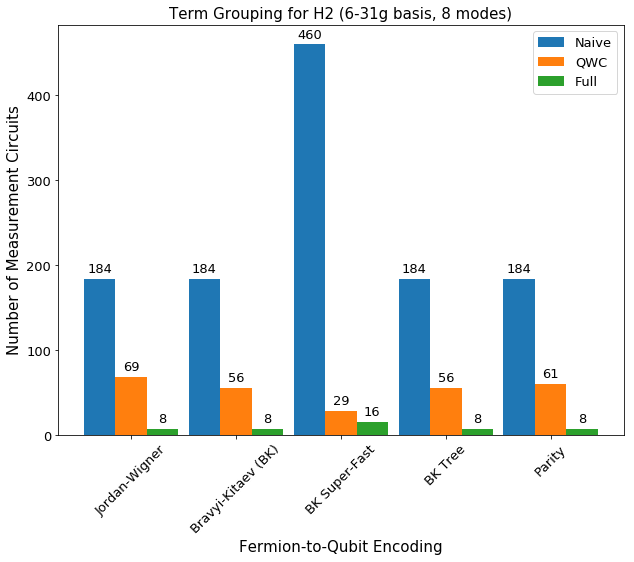

In [29]:
# copying the data printed out above
naive = (184,184,460,184,184)
qwc   = (69,56,29,56,61)
full  = (8,8,16,8,8)

xaxis = np.array((1,2,3,4,5))

width = 0.3

fig, ax = plt.subplots(figsize=(9,8))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Fermion-to-Qubit Encoding')
ax.set_title('Term Grouping for H2 (6-31g basis, 8 modes)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('Jordan-Wigner', 'Bravyi-Kitaev (BK)', 'BK Super-Fast', 'BK Tree', 'Parity'),
                  rotation=30)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [26]:
# There is some variation in the number of cliques found for the same
# molecule+encoding between trials.
# I will generate this data later (will take ~60 minutes to complete).
# Then we can compare average runtimes and average number of cliques found.
results = []
for file in Hfiles:
    for comm_type, comm_str in zip([QWCCommutativity, FullCommutativity], ['QWC','FULL']):
        ret, times = many_trials(file, comm_type, 100)
        results += [(file,comm_str,ret,times)]

print('\n\n-------------------')
print('All trials finished')
for r in results:
    print(r[0],r[1],r[2],np.mean(r[3]))

--------------
hamiltonians/H2_6-31g_JW_0.7_AS4.txt
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.12s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s


MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
MEASURECIRCUIT: Elapsed time: 0.11s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuit

MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.12s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASU

MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.07s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.06s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.07s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.07s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.07s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 1.07s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASU

MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian 

MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 56 unique circuits
MEASURECIRCUIT: Elapsed time: 0.09s
MEASURECIRCUIT: Generated graph for the Hamiltonian 

MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.87s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.86s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.86s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.87s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.86s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.87s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASU

MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.88s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.87s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.89s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.93s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.87s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 8 unique circuits
MEASURECIRCUIT: Elapsed time: 0.88s
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.


KeyboardInterrupt: 

In [30]:
# Now look at H2O molecule
Hfiles = ['hamiltonians/H2O_6-31g_{}_104_AS6.txt'.format(e) for e in ['JW','BK','BKSF','BKT','PC']]

print_cliques(Hfiles)

--------------
hamiltonians/H2O_6-31g_JW_104_AS6.txt
12 qubits
631 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 630 nodes.
MEASURECIRCUIT: BronKerbosch found 170 unique circuits
MEASURECIRCUIT: Elapsed time: 85.99s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 630 nodes.


KeyboardInterrupt: 

In [7]:
# What is the effect of term grouping across increasing Active Spaces?
Hfiles = ['hamiltonians/H2_6-31g_JW_0.7_AS{}.txt'.format(a) for a in [1,2,3,4]]

print_cliques(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS1.txt
2 qubits
4 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 5 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS3.txt
6 qubits
62 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 61 no

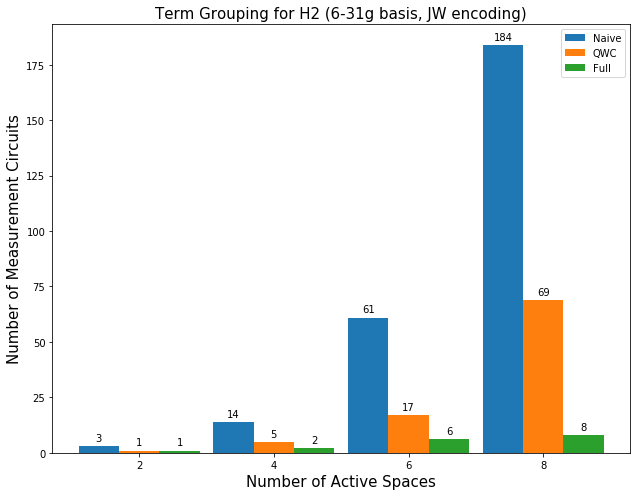

In [8]:
# copying the data printed out above
naive = (3,14,61,184)
qwc   = (1,5,17,69)
full  = (1,2,6,8)

# active spaces (x-axis)
# There is a weird naming convention...
# Openfermion lists active spaces as 1,2,3,4
# But, active spaces always come in pairs so there are actually
# twice as many spaces as what Openfermion says there is... its confusing
AS = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(AS - width, naive, width, label='Naive')
rects2 = ax.bar(AS, qwc, width, label='QWC')
rects3 = ax.bar(AS + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Number of Active Spaces')
ax.set_title('Term Grouping for H2 (6-31g basis, JW encoding)')
ax.set_xticks(AS)
ax.set_xticklabels(('2', '4', '6', '8'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

----
## Using NetworkX Poly-Time Heuristic

In [6]:
def print_cliques(filelist):
    for file in filelist:
        print('--------------')
        print(file)
        H = parseHamiltonian(file)
    
        # For some qubit encodings, there isn't a single term acting on all qubits
        # so this will report the wrong qubit#
        # Instead, look for the largest index being operated on.
        ops = [term[1] for term in H]
        #Nq = max([len(op) for op in ops])
        Nq = max([int(op[-1][1:]) for op in ops]) + 1
        print('{} qubits'.format(Nq))
    
        print('{} total terms\n'.format(len(H)))

        for commutativity_type, type_str in zip([QWCCommutativity, FullCommutativity],['QWC','FULL']):
            print(type_str + 'Commutation:')
            cliques = genMeasureCircuit(H, Nq, commutativity_type, clique_cover_method=NetworkX_approximate_clique_cover)
            print()

In [7]:
def many_trials(filename, commutativity_type, numtrials):
    H = parseHamiltonian(filename)
    ops = [term[1] for term in H]
    Nq = max([int(op[-1][1:]) for op in ops]) + 1
    print('--------------')
    print(filename)
    results = []
    runtimes = []
    for i in range(numtrials):
        start_time = time.time()
        cliques = genMeasureCircuit(H, Nq, commutativity_type, clique_cover_method=NetworkX_approximate_clique_cover)
        end_time = time.time()
        results += [len(cliques)]
        runtimes += [end_time - start_time]
    return Counter(results), runtimes

In [8]:
# What is the effect of term grouping across basis representations?

In [9]:
# What is the effect of term grouping across qubit encodings?
# First look at H2 molecule
Hfiles = ['hamiltonians/H2_6-31g_{}_0.7_AS4.txt'.format(e) for e in ['JW','BK','BKSF','BKT','PC']]

print_cliques(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 72 unique circuits
MEASURECIRCUIT: Elapsed time: 1.11s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 15 unique circuits
MEASURECIRCUIT: Elapsed time: 0.84s

--------------
hamiltonians/H2_6-31g_BK_0.7_AS4.txt
8 qubits
185 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 57 unique circuits
MEASURECIRCUIT: Elapsed time: 2.68s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 13 unique circuits
MEASURECIRCUIT: Elapsed time: 1.37s

--------------
hamiltonians/H2_6-31g_BKSF_0.7_AS4.txt
28 q

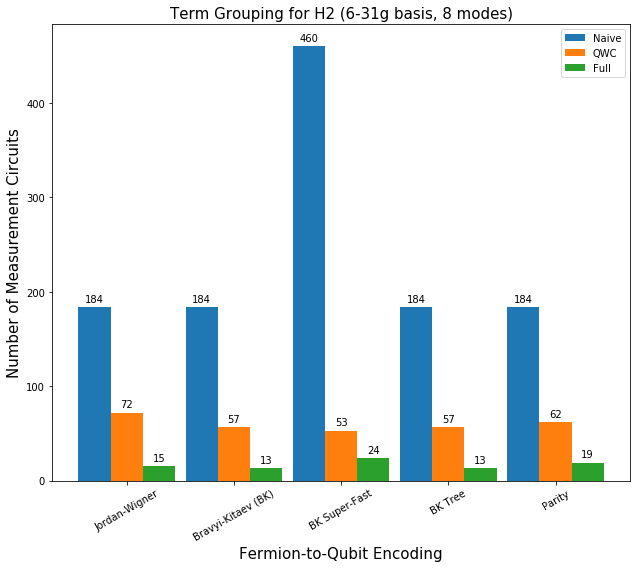

In [10]:
# copying the data printed out above
naive = (184,184,460,184,184)
qwc   = (72,57,53,57,62)
full  = (15,13,24,13,19)

xaxis = np.array((1,2,3,4,5))

width = 0.3

fig, ax = plt.subplots(figsize=(9,8))
rects1 = ax.bar(xaxis - width, naive, width, label='Naive')
rects2 = ax.bar(xaxis, qwc, width, label='QWC')
rects3 = ax.bar(xaxis + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Fermion-to-Qubit Encoding')
ax.set_title('Term Grouping for H2 (6-31g basis, 8 modes)')
ax.set_xticks(xaxis)
ax.set_xticklabels(('Jordan-Wigner', 'Bravyi-Kitaev (BK)', 'BK Super-Fast', 'BK Tree', 'Parity'),
                  rotation=30)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [11]:
# What is the effect of term grouping across increasing Active Spaces?
Hfiles = ['hamiltonians/H2_6-31g_JW_0.7_AS{}.txt'.format(a) for a in [1,2,3,4]]

print_cliques(Hfiles)

--------------
hamiltonians/H2_6-31g_JW_0.7_AS1.txt
2 qubits
4 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 1 unique circuits
MEASURECIRCUIT: Elapsed time: 0.00s

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: NetworkX_approximate_clique_cover found 2 unique circuits
MEASURECIRCUIT: Elapsed time: 0.01s

--------------
hamiltonians/H2_6-31g_JW_0.7_AS3.txt
6 qubits
62 total t

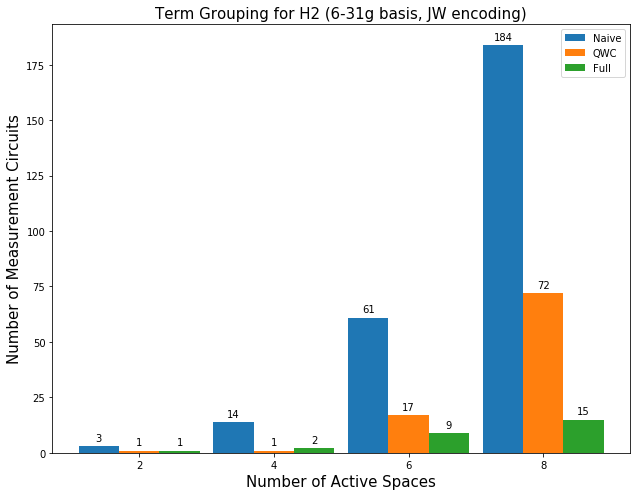

In [12]:
# copying the data printed out above
naive = (3,14,61,184)
qwc   = (1,1,17,72)
full  = (1,2,9,15)

# active spaces (x-axis)
# There is a weird naming convention...
# Openfermion lists active spaces as 1,2,3,4
# But, active spaces always come in pairs so there are actually
# twice as many spaces as what Openfermion says there is... its confusing
AS = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(AS - width, naive, width, label='Naive')
rects2 = ax.bar(AS, qwc, width, label='QWC')
rects3 = ax.bar(AS + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Number of Active Spaces')
ax.set_title('Term Grouping for H2 (6-31g basis, JW encoding)')
ax.set_xticks(AS)
ax.set_xticklabels(('2', '4', '6', '8'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()